# Libraries


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.losses import CategoricalCrossentropy
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset


In [2]:
data_dir = "archive\data\\train"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


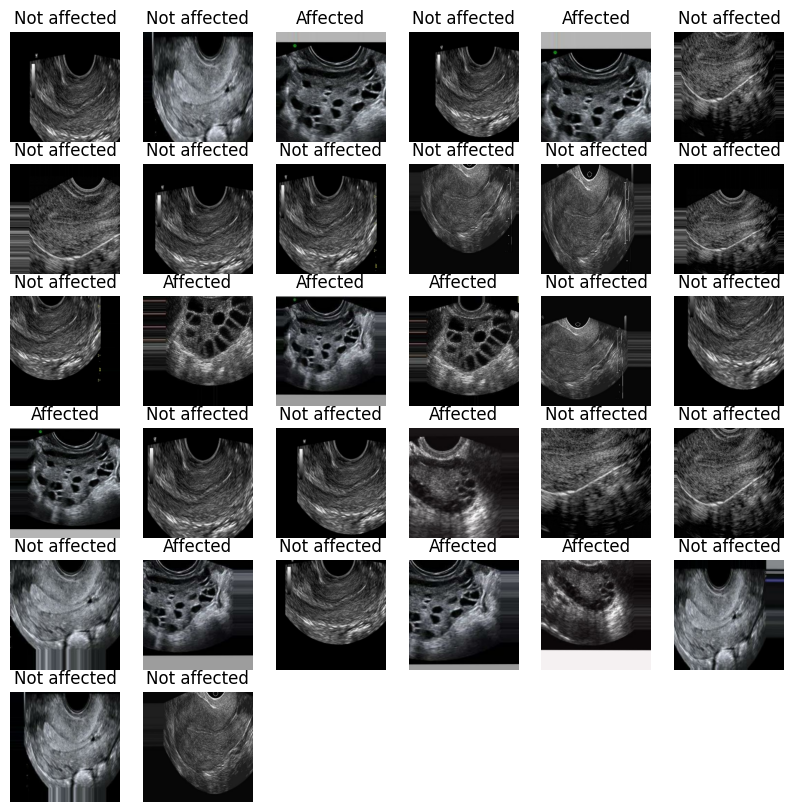

In [6]:
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [13]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    validation_split=0.3,
    fill_mode="nearest",
)
train_it = datagen.flow_from_directory(
    data_dir,
    class_mode="categorical",
    classes=["Affected", "Not affected"],
    target_size=(224, 224),
    batch_size=100,
    subset="training",
    seed=24,
)
val_it = datagen.flow_from_directory(
    data_dir,
    class_mode="categorical",
    classes=["Affected", "Not affected"],
    target_size=(224, 224),
    batch_size=100,
    subset="validation",
    seed=24,
)

Found 1348 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [17]:
batchX, batchy = train_it[0]
print("Batch shape=%s, min=%.3f, max=%.3f" % (batchy.shape, batchy.min(), batchy.max()))
print("Batch shape=%s, min=%.3f, max=%.3f" % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(100, 2), min=0.000, max=1.000
Batch shape=(100, 224, 224, 3), min=0.000, max=1.000


# Model 1


In [28]:
model1 = Sequential()
model1.add(
    Conv2D(10, (5, 5), padding="valid", activation="relu", input_shape=(224, 224, 3))
)
model1.add(MaxPooling2D(pool_size=(4, 4)))
model1.add(Conv2D(12, (5, 5), padding="valid", activation="relu"))
model1.add(MaxPooling2D(pool_size=(4, 4)))
# model1.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model1.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model1.add(MaxPooling2D(pool_size=(4,4)))
model1.add(Flatten())
# model1.add(Dense(128,activation='relu'))
# model1.add(Dense(64,activation='relu'))
model1.add(Dense(2, activation="softmax"))

model1.summary()

c:\Users\DEEPAK KUMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 10)   │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 51, 51, 12)     │         3,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1728)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         3,458 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,230 (28.24 KB)

 Trainable params: 7,230 (28.24 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model1.compile(optimizer="adam", loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [30]:
history = model1.fit(train_it, validation_data=val_it, epochs=5)

Epoch 1/5


c:\Users\DEEPAK KUMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6104 - loss: 0.6563 - val_accuracy: 0.8368 - val_loss: 0.4630
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 996ms/step - accuracy: 0.8484 - loss: 0.4188 - val_accuracy: 0.8785 - val_loss: 0.3029
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 969ms/step - accuracy: 0.8868 - loss: 0.2818 - val_accuracy: 0.9201 - val_loss: 0.2083
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 959ms/step - accuracy: 0.9227 - loss: 0.1868 - val_accuracy: 0.9479 - val_loss: 0.1323
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 996ms/step - accuracy: 0.9696 - loss: 0.1163 - val_accuracy: 0.9444 - val_loss: 0.1228


Plots


In [18]:
def loss_and_accuracy_plot(history):
    # Plotting model loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plotting model accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

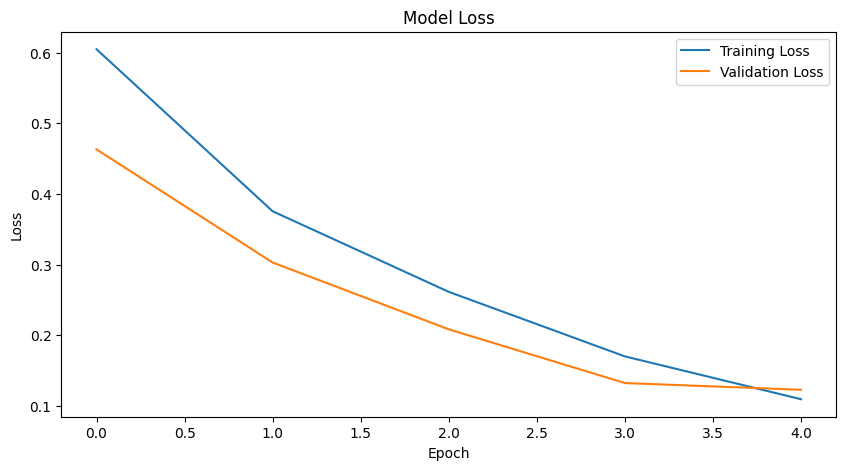

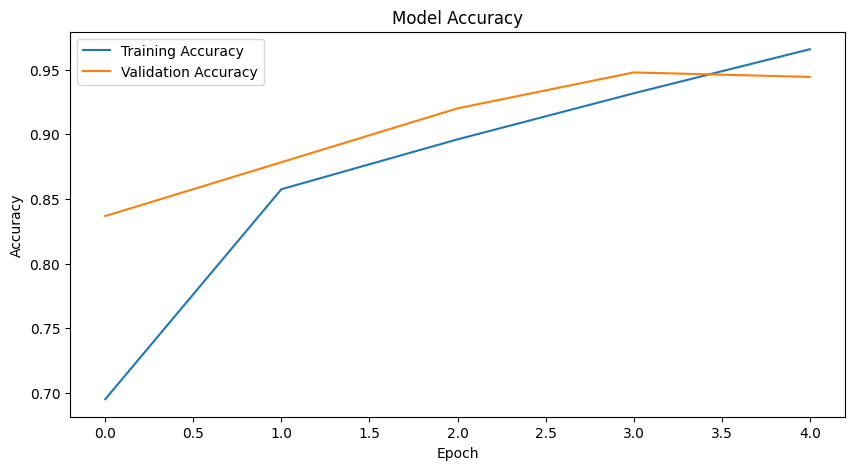

In [45]:
loss_and_accuracy_plot(history)

# Model 2


In [19]:
model2 = Sequential()
model2.add(
    Conv2D(12, (6, 6), padding="valid", activation="relu", input_shape=(224, 224, 3))
)
model2.add(MaxPooling2D(pool_size=(6, 6)))
model2.add(Conv2D(15, (5, 5), padding="valid", activation="relu"))
model2.add(MaxPooling2D(pool_size=(5, 5)))
model2.add(Conv2D(10, (3, 3), padding="valid", activation="relu"))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Flatten())
model2.add(Dense(2, activation="softmax"))

model2.summary()

c:\Users\DEEPAK KUMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 219, 219, 12)   │         1,308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 15)     │         4,515 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 10)       │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,205 (28.14 KB)

 Trainable params: 7,205 (28.14 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model2.compile(optimizer="adam", loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [21]:
history2 = model2.fit(train_it, validation_data=val_it, epochs=8)

Epoch 1/8


c:\Users\DEEPAK KUMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5394 - loss: 0.6928 - val_accuracy: 0.6424 - val_loss: 0.6480
Epoch 2/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6669 - loss: 0.6329 - val_accuracy: 0.8542 - val_loss: 0.5309
Epoch 3/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8550 - loss: 0.4908 - val_accuracy: 0.9253 - val_loss: 0.3087
Epoch 4/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 962ms/step - accuracy: 0.9114 - loss: 0.2867 - val_accuracy: 0.9444 - val_loss: 0.1591
Epoch 5/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9360 - loss: 0.1889 - val_accuracy: 0.9410 - val_loss: 0.1483
Epoch 6/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9399 - loss: 0.1501 - val_accuracy: 0.9688 - val_loss: 0.0895
Epoch 7/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9673 - loss: 0.0947 - val_accuracy: 0.9722 - val_loss: 0.0841
Epoch 8/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9718 - loss: 0.0810 - val_accuracy: 0.9913 - val_loss: 0.0417


In [ ]:
model2.save("saved_models/model.keras")

In [8]:
model = tf.keras.models.load_model("saved_models/model.keras")

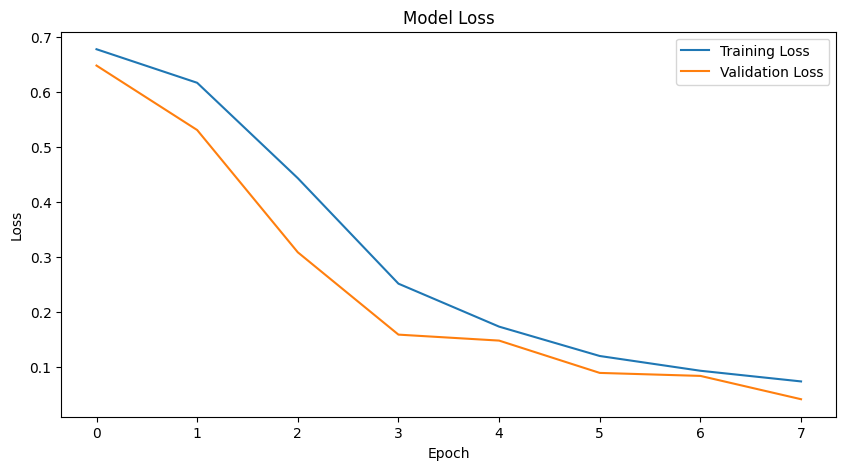

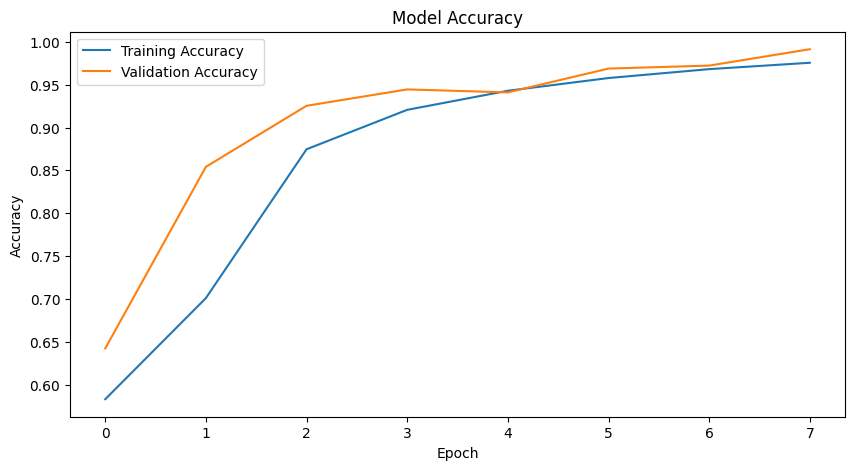

In [22]:
loss_and_accuracy_plot(history2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.9962847 , 0.00371529]], dtype=float32)

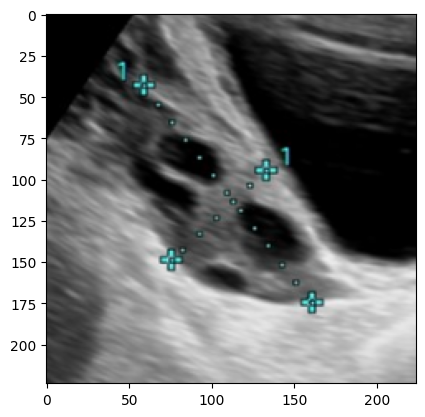

In [11]:
# img = cv2.imread('archive\data\\test\infected\img_0_275.jpg')

img = cv2.imread("RH_dataset\PCOD\\2.JPG")
img = cv2.resize(img, (224, 224))
img = img.astype("float32") / 255.0
plt.imshow(img)
img = np.expand_dims(img, axis=0)
model.predict(img)
# plt.imshow(img)

In [25]:
print(img.shape)

(1, 224, 224, 3)


Prediction with the Images from RH_dataset


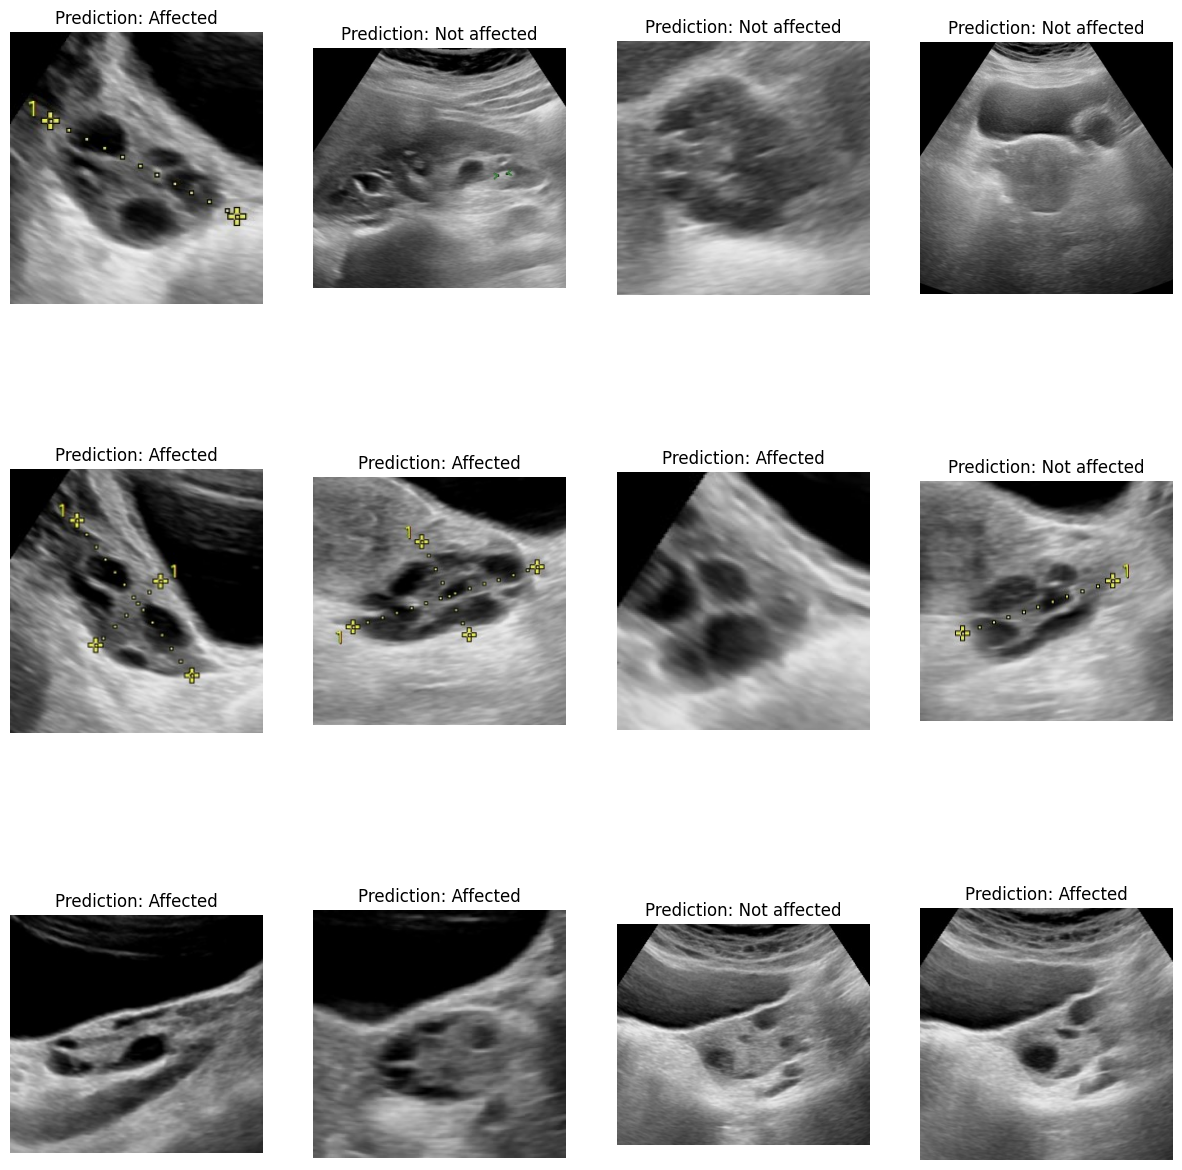

In [46]:
import glob

class_labels = ["Affected", "Not affected"]

folder_path = "RH_dataset\PCOD\\"

image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

num_images = len(image_files)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, image_file in enumerate(image_files):
    img = cv2.imread(image_file)
    if img is None:
        print(f"Error loading image: {image_file}")
        continue
    img_resized = cv2.resize(img, (224, 224))
    img_resized = np.expand_dims(img_resized, axis=0)

    img_resized = img_resized.astype("float32") / 255.0

    prediction = model.predict(img_resized, verbose=0)

    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]

    row = i // num_cols
    col = i % num_cols

    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"Prediction: {predicted_class}")
    axes[row, col].axis("off")

plt.show()

# Testing


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


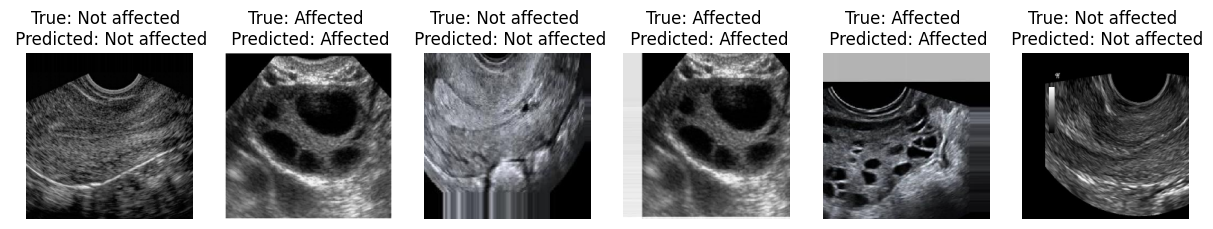

In [15]:
import random
from tensorflow.keras.preprocessing import image

num_samples = 6
sample_indices = random.sample(range(len(val_it.filenames)), num_samples)

plt.figure(figsize=(15, 8))

for i, idx in enumerate(sample_indices):

    img_path = os.path.join(val_it.directory, val_it.filenames[idx])

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0

    true_label = os.path.basename(os.path.dirname(img_path))

    prediction = model.predict(img_array)[0]
    predicted_class = np.argmax(prediction)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.title(
        f"True: {true_label.capitalize()} \n Predicted: {class_names[predicted_class]}"
    )

    plt.axis("off")

plt.show()

# Model Performance evaluation


In [16]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/data/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=42,
)

test_images = []
test_labels = []
predicted_labels = []

for images, labels in test_ds:
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Calculating performance metrics
print("\n Classification Report:")
print(classification_report(test_labels, predicted_labels))

print("\n Confusion Matrix:")
print(confusion_matrix(test_labels, predicted_labels))

f1 = f1_score(test_labels, predicted_labels, average="weighted")
recall = recall_score(test_labels, predicted_labels, average="weighted")

print("\nF1 Score: {:.2f}".format(f1))
print("\nRecall: {:.2f}\n".format(recall))

Found 1922 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

In [49]:
import os

# Path to the test dataset directory
test_dir = "archive/data/test"

# Count the number of files in the test dataset directory
num_files = sum(len(files) for _, _, files in os.walk(test_dir))
print("Number of files in the test dataset directory:", num_files)

# Print a few file paths from the test dataset directory
sample_files = os.listdir(test_dir)[:5]
print("Sample file paths from the test dataset directory:")
for file in sample_files:
    print(os.path.join(test_dir, file))

Number of files in the test dataset directory: 1922
Sample file paths from the test dataset directory:
archive/data/test\infected
archive/data/test\notinfected
